In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


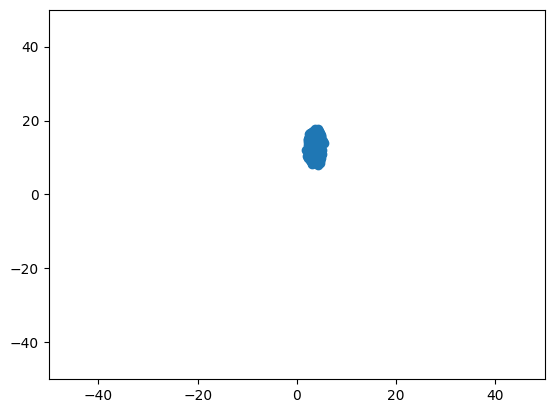

In [4]:
df = pd.DataFrame({'t': 1.1, 'x': [], 'y': []})
for i in range(3,5):
	p = i*3.7
	ys = np.random.normal(p, 1, 1000)
	xs = np.random.normal(3.7, 0.5, 1000)

	sdf = pd.DataFrame({'t': 1, 'x': xs, 'y': ys})
	df = pd.concat([df, sdf])

# for i in range(4, 11):
# 	p = i*3.7
# 	xs = np.random.normal(p, 1, 1000)
# 	ys = np.random.normal(3.7, 1, 1000)

# 	sdf = pd.DataFrame({'t': 1, 'x': xs, 'y': ys})
# 	df = pd.concat([df, sdf])

plt.scatter(df['x'], df['y'])
plt.xlim((-50,50))
plt.ylim((-50,50))
plt.show()

In [37]:
export = df.to_csv('test_data.csv', index=False)

In [38]:
df

,t,x,y
0,1.0,3.372175,11.669572
1,1.0,4.518874,9.299167
2,1.0,3.710062,11.555876
3,1.0,4.613761,11.397917
4,1.0,3.349175,11.679891
...,...,...,...
995,1.0,37.417629,3.721697
996,1.0,37.382855,3.517926
997,1.0,36.314023,3.246595
998,1.0,37.942571,2.161215


In [40]:
df['x_idx'] = np.floor(df['x']).astype(int)
df['y_idx'] = np.floor(df['y']).astype(int)
df

,t,x,y,x_id,y_id,x_idx,y_idx
0,1.0,3.372175,11.669572,3,11,3,11
1,1.0,4.518874,9.299167,4,9,4,9
2,1.0,3.710062,11.555876,3,11,3,11
3,1.0,4.613761,11.397917,4,11,4,11
4,1.0,3.349175,11.679891,3,11,3,11
...,...,...,...,...,...,...,...
995,1.0,37.417629,3.721697,37,3,37,3
996,1.0,37.382855,3.517926,37,3,37,3
997,1.0,36.314023,3.246595,36,3,36,3
998,1.0,37.942571,2.161215,37,2,37,2


In [41]:
initial_clusters = df.groupby(['x_idx', 'y_idx']).apply(lambda group: group.index.tolist()).tolist()
initial_clusters

[[952],
 [157],
 [213],
 [930, 934],
 [193, 287, 461],
 [241],
 [432, 787],
 [599],
 [770],
 [4, 321, 957],
 [164],
 [500],
 [327],
 [623],
 [218],
 [906],
 [782, 830],
 [955],
 [219, 573],
 [408, 520, 543, 810],
 [7, 236, 237, 354, 393, 453, 659, 732, 826, 970, 973],
 [38, 114, 133, 172, 411, 490, 561, 667, 673, 696, 713, 841, 897],
 [68, 128, 295, 341, 399, 698, 215],
 [668, 2, 64, 219, 440, 442, 924],
 [9, 23, 72, 85, 131, 172, 189, 505, 631, 701, 930, 955, 972],
 [28, 103, 134, 352, 356, 627, 687, 745, 812],
 [230, 252, 347, 358, 730, 880, 911, 38, 236, 501],
 [83, 384, 469, 525, 693, 844, 953, 997],
 [27,
  51,
  140,
  143,
  168,
  190,
  226,
  247,
  289,
  355,
  400,
  420,
  519,
  559,
  588,
  614,
  648,
  827,
  906,
  914],
 [32, 36, 177, 285, 352, 472, 512, 521, 547, 634, 761, 785],
 [336, 190, 347, 686, 925],
 [1, 184, 253, 363, 508, 544, 552, 577, 718, 783, 813, 967, 991],
 [197,
  198,
  250,
  320,
  393,
  442,
  573,
  657,
  698,
  709,
  716,
  797,
  806,
  8

In [10]:
import math

# Example point and direction
x = 10  # Your point's x-coordinate
y = 5   # Your point's y-coordinate
d = 1   # Your direction variable
for d in [1,2]:
	print(d)
	for x,y in [(5,5), (5,-5), (-5,-5), (-5,5), (0,5), (0,-5), (5,0), (-5,0)]:
		# print(x,y)

		# Calculate the raw angle from the positive y-axis
		raw_angle = math.degrees(math.atan2(x, y))  # Note the switch in order because atan2 normally considers y first from x-axis

		# Adjust the angle based on the direction
		if d == 1:
			# Arrow points towards (0,0), so we "reverse" the direction it's "coming from"
			adjusted_angle = (raw_angle + 180) % 360
		else:
			# Arrow points away from (0,0), which is the 'standard' direction
			adjusted_angle = raw_angle

		# Convert to clockwise from true north
		# Note: In this system, no further adjustment might be needed since we've already converted to degrees from north
		true_north_angle = (adjusted_angle) % 360

		print(true_north_angle)

1
225.0
315.0
45.0
135.0
180.0
0.0
270.0
90.0
2
45.0
135.0
225.0
315.0
0.0
180.0
90.0
270.0
